# Chapter 9: Two Landmark Quantum Algorithms

Bernstein-Vazirani and Grover's algorithms.

---

**Note:** This notebook corresponds to Chapter 7 of the textbook.

**Prerequisites:**
- Python 3.8+
- Qiskit 2.1.2
- See `Chapter02_QuantumSoftware.ipynb` for installation instructions


In [1]:
# Setup and imports
import numpy as np
import math
from qiskit import QuantumCircuit
from IPython.display import display
from qiskit.circuit.library.standard_gates.u import UGate
from qiskit.circuit.library import grover_operator
from Chapter03_EngineeringOptimization_functions import (truss2x2,truss3x2,truss2x3,truss3x3,truss_grid,truss_10bar)
from Chapter08_QuantumGates_functions import simulateCircuit, analyzeCircuitForSimulator, analyzeCircuitForHardware
from Chapter11_LandmarkAlgorithms_functions import (bv_secret_circuit, grover_secret_circuit,
                GroverSubsetSum)


ImportError: cannot import name 'GroverSubsetSum' from 'Chapter11_LandmarkAlgorithms_functions' (d:\Dropbox\Personal\suresh\Software\Github\ERSL-Private\QCTextSoftware\Chapter11_LandmarkAlgorithms_functions.py)

## Bernstein Vazarani Algorithm

### Berstein Vazarani Circuit 

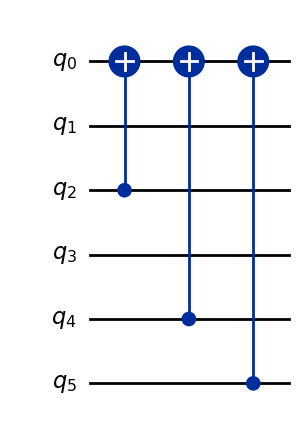

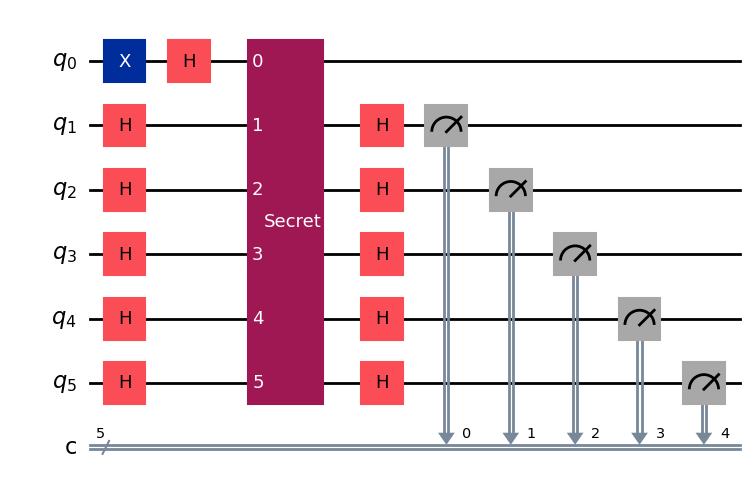

{'11010': 1}
The total depth is  5
The total width is  11


In [ ]:
U, n = bv_secret_circuit()
circuit = QuantumCircuit(n+1,n)
circuit.x(0) 
circuit.h(0) # This brings qubit 0 to |-> state
circuit.h(range(1,n+1)) 
circuit.unitary(U,range(n+1),'Secret')
circuit.h(range(1,n+1))
circuit.measure(range(1,n+1), range(0,n)) 
display(circuit.draw('mpl')) 
counts = simulateCircuit(circuit,shots = 1)
print(counts)
print("The total depth is ", circuit.depth())
print("The total width is ", circuit.width())

## Grover algorithm

In [ ]:

oracle = grover_secret_circuit()
grover_op = grover_operator(oracle)
nQubits = grover_op.num_qubits
N = 2**nQubits
K = math.floor(math.pi / (4 * math.asin(math.sqrt(1 / N))))
print("Optimal number of Grover iterations:", K)
qc = QuantumCircuit(grover_op.num_qubits)

qc.h(range(grover_op.num_qubits)) # Create  superposition of all basis states
# Apply Grover operator the optimal number of times
qc.compose(grover_op.power(K), inplace=True)
qc.measure_all()

counts = simulateCircuit(qc,shots = 1000)
print(counts)

Optimal number of Grover iterations: 4
{'11010': 1023, '11011': 1}
